In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [4]:
data_dir = '/content/drive/MyDrive/NSFW-FSW-Dataset-Omar-3'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['nsfw', 'sfw']


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [7]:
trainset = ImageFolder(data_dir+'/train', transform=transform_train)
testset = ImageFolder(data_dir+'/test', transform=transform_test)

In [8]:
len(trainset)

5000

In [9]:
img, label = trainset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[-0.6471, -0.6235, -0.5922,  ...,  0.7647,  0.7804,  0.7804],
         [-0.6392, -0.6157, -0.5922,  ...,  0.7804,  0.7647,  0.7804],
         [-0.6392, -0.6157, -0.5843,  ...,  0.7882,  0.7882,  0.7804],
         ...,
         [ 0.1608,  0.1608,  0.1451,  ..., -0.0118,  0.1843,  0.2392],
         [ 0.1373,  0.1451,  0.1059,  ...,  0.0431,  0.1922,  0.2235],
         [ 0.0980,  0.0980,  0.0667,  ...,  0.0353,  0.1373,  0.1529]],

        [[-0.8196, -0.8196, -0.8118,  ...,  0.1686,  0.1765,  0.2000],
         [-0.8196, -0.8118, -0.8039,  ...,  0.1765,  0.1451,  0.1922],
         [-0.8275, -0.8196, -0.8039,  ...,  0.1922,  0.1686,  0.1686],
         ...,
         [-0.3961, -0.4039, -0.4118,  ..., -0.1608,  0.0353,  0.0980],
         [-0.4196, -0.4118, -0.4275,  ..., -0.0902,  0.0667,  0.0980],
         [-0.4431, -0.4353, -0.4667,  ..., -0.0824,  0.0275,  0.0510]],

        [[-0.9216, -0.8980, -0.8824,  ..., -0.0667, -0.0667, -0.0431],
         [-0.9216, -0.8980, -0.8824,  ..., -0

In [10]:
num_classes = 2

In [11]:
batch_size = 16

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([16, 3, 224, 224])
torch.Size([3, 224, 224])
1


In [14]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [15]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

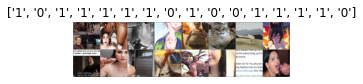

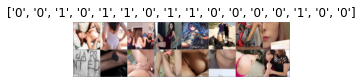

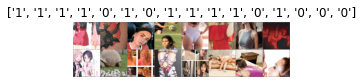

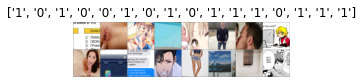

In [16]:
for i in range(4):
    show_batch_images(trainloader)

In [17]:
from torchvision import models

In [18]:
vgg = models.vgg16_bn()

In [19]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [20]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [21]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [22]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=2, bias=True)]


In [24]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [25]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [26]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return (100 * correct / total,pred,labels)

In [27]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [28]:
for param in vgg.parameters():
    param.requires_grad = False

In [29]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [31]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([2, 4096])
torch.Size([2])


In [32]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(vgg.parameters(), lr=0.05)

Iteration: 0/313, Loss: 0.7665
Iteration: 50/313, Loss: 9.8113
Iteration: 100/313, Loss: 6.3498
Iteration: 150/313, Loss: 9.0720
Iteration: 200/313, Loss: 2.0299
Iteration: 250/313, Loss: 0.0002
Iteration: 300/313, Loss: 21.7108
Epoch: 1/10, Test acc: 65.4, Train acc: 86.84
Iteration: 0/313, Loss: 5.4391
Iteration: 50/313, Loss: 2.9313
Iteration: 100/313, Loss: 1.9325
Iteration: 150/313, Loss: 42.3015
Iteration: 200/313, Loss: 0.8781
Iteration: 250/313, Loss: 3.9643
Iteration: 300/313, Loss: 5.5768
Epoch: 2/10, Test acc: 63.6, Train acc: 84.76
Iteration: 0/313, Loss: 5.9033
Iteration: 50/313, Loss: 18.0251
Iteration: 100/313, Loss: 0.9240
Iteration: 150/313, Loss: 21.4829
Iteration: 200/313, Loss: 8.7751
Iteration: 250/313, Loss: 7.2371
Iteration: 300/313, Loss: 6.2360
Epoch: 3/10, Test acc: 62.7, Train acc: 83.66
Iteration: 0/313, Loss: 0.0026
Iteration: 50/313, Loss: 7.1742
Iteration: 100/313, Loss: 10.5547
Iteration: 150/313, Loss: 12.3682
Iteration: 200/313, Loss: 7.1303
Iteration:

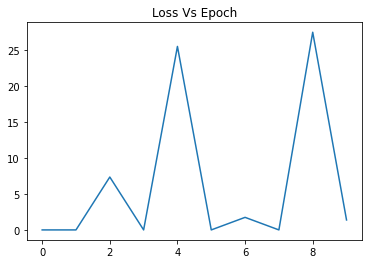

In [33]:
loss_epoch_arr = []
train_accuracy = []
test_accuracy = []
loss_iterations = []
max_epochs = 10
predicted_labels = []
true_labels = []
test_acc = 0

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 50 == 0:
            print('Iteration: %d/%d, Loss: %0.4f' % (i, n_iters, loss.item()))
            loss_iterations.append(loss.item())
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    train_acc,predicted_labels,true_labels = evaluation(trainloader, vgg)
    test_acc,predicted_labels,true_labels = evaluation(testloader, vgg)      
    print('Epoch: {}/{}, Test acc: {}, Train acc: {}'.format(epoch+1, max_epochs,test_acc,train_acc))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    
    
plt.plot(loss_epoch_arr)
plt.title('Loss Vs Epoch')
plt.show()

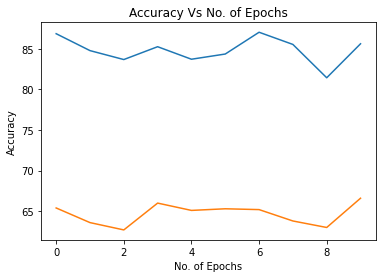

In [34]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.title('Accuracy Vs No. of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.show()

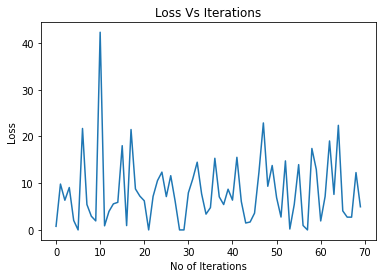

In [35]:
8plt.plot(loss_iterations)
plt.title('Loss Vs Iterations')
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.show()